## IMPORTS

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('turboaz.csv') #first loading data

In [3]:
X1 = dataset['Yurush'].map(lambda x: x.rstrip("km").replace(' ','')).map(int)
X2 = dataset['Buraxilish ili'] #Buraxilish ili
y = dataset['Qiymet'].map(lambda x: float(x.rstrip('$'))*1.7 if '$' in x else float(x.rstrip('AZN')))  #Qiymet

Text(0,0.5,'Y Label - Qiymet')

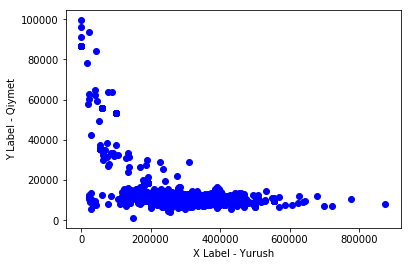

In [4]:
plt.figure(1)
plt.scatter(X1, y, color ='b')
plt.xlabel('X Label - Yurush')
plt.ylabel('Y Label - Qiymet')

Text(0,0.5,'Y Label - Qiymet')

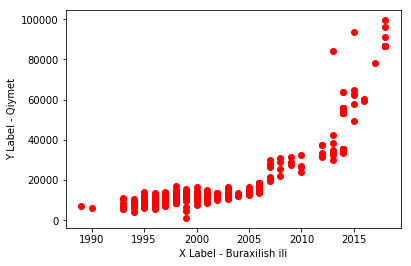

In [5]:
plt.figure(2)
plt.scatter(X2, y, color = 'r')
plt.xlabel('X Label - Buraxilish ili')
plt.ylabel('Y Label - Qiymet')

Text(0.5,0,'Z Label - Qiymet')

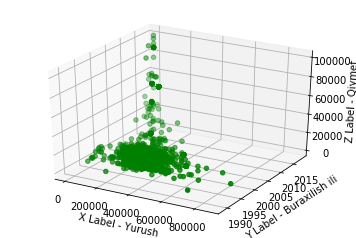

In [6]:
fig = plt.figure(3)
ax = fig.add_subplot(111, projection='3d') #3d projection
ax.scatter(X1, X2, y, c = 'g') 
ax.set_xlabel('X Label - Yurush')
ax.set_ylabel('Y Label - Buraxilish ili')
ax.set_zlabel('Z Label - Qiymet')

In [7]:
#save featres and result for future 
X1_s = X1
X2_s = X2
y_s = y

In [8]:
#normalize data 
X1 = (X1 - X1.mean()) / X1.std()
X2 = (X2 - X2.mean()) / X2.std()
y =  (y - y.mean()) / y.std() 

In [9]:
m = len(X1)
ones = np.ones(m)
X = np.array([ones, X1, X2]).T
theta = np.array([0,0,0])

In [10]:
#Cost function
def computeCost(X, y, theta):
    m = len(y)
    h_x = X.dot(theta) #compute h_theta(x) = theta^T * x
    J = np.sum((h_x - y)**2)/2/m
    return J

In [11]:
J = computeCost(X, y, theta)
print(J)

0.499623493975903


In [12]:
iterations = 10000
alpha = 0.001 #learning rate

In [13]:
def gradientDescent(X, y, theta, alpha, iterations):
    J_history = [0] * iterations
    m = len(y)
    
    for i in range(iterations):
        if i % 1000 == 0:
            print("iteration #%d" % i)
            print(computeCost(X,y,theta))    
        #hypothesis    
        h_x = X.dot(theta)
        theta = theta - alpha/m * (X.T.dot(h_x-y)) 
    
        cost = computeCost(X,y,theta)
        J_history[i] = cost  #Save the cost J in every iteration 
    return theta, J_history

In [14]:
new_theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

iteration #0
0.499623493975903
iteration #1000
0.14536267254784274
iteration #2000
0.11725139985160618
iteration #3000
0.11061262798913966
iteration #4000
0.10802698912214947
iteration #5000
0.10694097937378129
iteration #6000
0.1064811230083809
iteration #7000
0.10628624090128104
iteration #8000
0.10620364497984423
iteration #9000
0.10616863845502354


Text(0.5,1,'Array of costs at each iteration ')

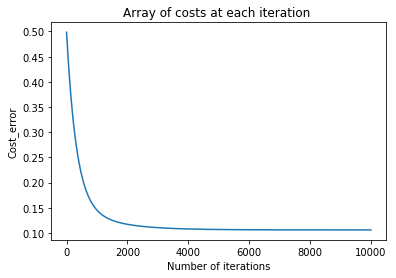

In [15]:
#visualization for  array of cost at each iteratin 
plt.plot(J_history)
plt.xlabel('Number of iterations')
plt.ylabel('Cost_error')
plt.title("Array of costs at each iteration ")

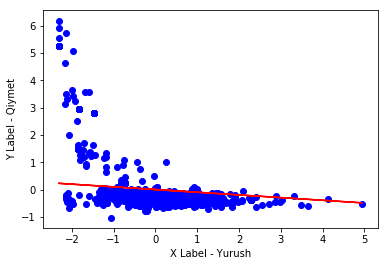

In [16]:
#visualization for line of predictions that made with parameters wia gradientDescent 
#first plot for Yurush and Qiymet
plt.figure(4)
plt.scatter(X1, y, color ='b')
plt.xlabel('X Label - Yurush')
plt.ylabel('Y Label - Qiymet')
prediction = new_theta[1] * X1 + new_theta[0]
plt.plot(X1, prediction, c ='r')
#plt.scatter(X1, prediction, c = 'r' )

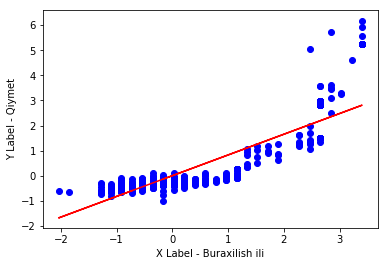

In [17]:
#Second plot for Buraxilish ili and Qiymet
plt.figure(5)
plt.scatter(X2, y, color = 'b')
plt.xlabel('X Label - Buraxilish ili')
plt.ylabel('Y Label - Qiymet')
prediction = new_theta[2] * X2 + new_theta[0]
plt.plot(X2, prediction, c ='r')
#plt.scatter(X2, prediction, c = 'r' )

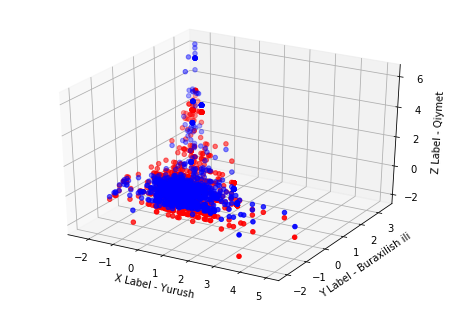

In [18]:
fig = plt.figure(6)
ax = fig.add_subplot( projection='3d') #3d projection
ax = Axes3D(fig)
ax.scatter(X1, X2, y, c = 'b') 
ax.set_xlabel('X Label - Yurush')
ax.set_ylabel('Y Label - Buraxilish ili')
ax.set_zlabel('Z Label - Qiymet')
prediction = new_theta[1] * X1 + new_theta[2] * X2 + new_theta[0]
ax.scatter(X1, X2, prediction, c = 'r' )

In [19]:
#TESTING PART 
# first car proporties
yurush1 = 240000
b_ili1 = 2000
qiymet1 = 11500

#now we will use feature scaling method to test this data
#since we have already normalise our data before therefore
#we need also to normalise this testing data
yurush1_S = (yurush1 - X1_s.mean()) / X1_s.std()
b_ili1_S = (b_ili1 -X2_s.mean()) / X2_s.std()
qiymet1_S = (qiymet1 - y_s.mean()) / y_s.std()

pre_qiymet_1 = new_theta[1] * yurush1_S + new_theta[2] * b_ili1_S + new_theta[0]

#now we need to go backward from normalize mode then we can see real price
pre_qiymet_1 = pre_qiymet_1 * y_s.std() + y_s.mean()
real_qiymet_1 = qiymet1_S * y_s.std() + y_s.mean()


print('Real qiymet: ', real_qiymet_1,'   ', 'prediction: ',pre_qiymet_1)

Real qiymet:  11500.0     prediction:  15841.438881101605


In [20]:
# second car
yurush2 = 415558
b_ili2 = 1996
qiymet2 = 8800

yurush2_S = (yurush2 - X1_s.mean()) / X1_s.std()
b_ili2_S = (b_ili2 -X2_s.mean()) / X2_s.std()
qiymet2_S = (qiymet2 - y_s.mean()) / y_s.std()

pre_qiymet_2 = new_theta[1] * yurush2_S + new_theta[2] * b_ili2_S + new_theta[0]


#now we need to go backward from normalize mode then we can see real price
pre_qiymet_2 = pre_qiymet_2 * y_s.std() + y_s.mean()
real_qiymet_2 = qiymet2_S * y_s.std() + y_s.mean()

print('Real qiymet: ',  real_qiymet_2, '   ', 'prediction: ',  pre_qiymet_2)

Real qiymet:  8800.0     prediction:  5426.065566509864


In [21]:
#Linear Regression using library
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

X_train = []

 #array of two features including values
for j in range(m):
    X_train.append([X1_s[j], X2_s[j]])
        
        
        
        
X_test = [[240000, 2000], [415558, 1996]] #X_test for yurush ve buraxilish ili 
y_test = [11500, 8800] #y_tes for qiymet

regression = linear_model.LinearRegression()
regression.fit(X_train, y_s) #fiting data to trin for finding cooeficents

y_pre = regression.predict(X_test)
print('Real qiymet: ', y_test,' ', 'preidction: ', y_pre) 


Real qiymet:  [11500, 8800]   preidction:  [15820.54127243  5453.69414862]


In [22]:
#several proporties of this library that makes it efficient to find coefficiants, mean_squared error

print("Coefficents:", regression.coef_) #coefficients
print("M.S.E:", mean_squared_error(y_test, y_pre)) #mean squared error
print("Variace", r2_score(y_test, y_pre))

Coefficents: [-1.05636330e-02  2.12807921e+03]
M.S.E: 14932419.868891176
Variace -7.1933716701734856


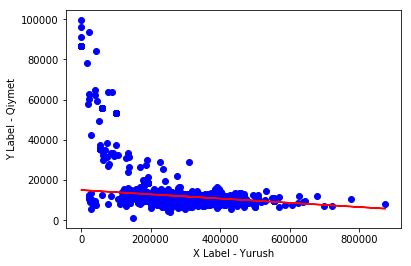

In [23]:
#Visulaization 

plt.figure(7)
plt.scatter(X1_s, y_s, color ='b')
plt.xlabel('X Label - Yurush')
plt.ylabel('Y Label - Qiymet')
prediction = regression.coef_[0] * X1_s + 15000
plt.plot(X1_s, prediction, c ='r')

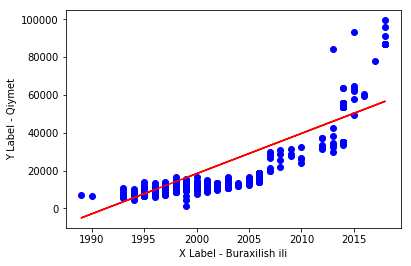

In [24]:
plt.figure(8)
plt.scatter(X2_s, y_s, color = 'b')
plt.xlabel('X Label - Buraxilish ili')
plt.ylabel('Y Label - Qiymet')
prediction = regression.coef_[1] * X2_s +regression.intercept_
plt.plot(X2_s, prediction, c ='r')


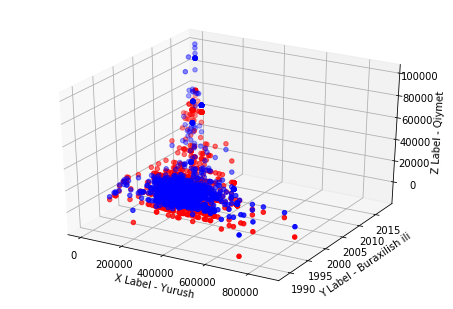

In [25]:
fig = plt.figure(9)
ax = fig.add_subplot( projection='3d') #3d projection
ax = Axes3D(fig)
ax.scatter(X1_s, X2_s, y_s, c = 'b') 
ax.set_xlabel('X Label - Yurush')
ax.set_ylabel('Y Label - Buraxilish ili')
ax.set_zlabel('Z Label - Qiymet')
predict = regression.coef_[0] * X1_s + regression.coef_[1] * X2_s + regression.intercept_
ax.scatter(X1_s, X2_s, predict, c = 'r' )

In [26]:
#. Solve linear regression by Normal equation
from numpy.linalg import inv

def normal_equation(X, y):  
    theta = inv(X.T.dot(X)).dot(X.T).dot(y)  
    # normal equation  
    # theta = (X.T * X)^(-1) * X.T * y  
      
    return theta # returns a list  

In [27]:
Y = (y[:, np.newaxis])
N_theta = normal_equation(X,Y) # finding theta

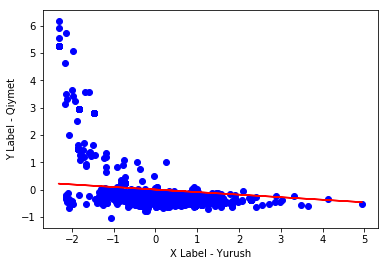

In [28]:
#visualisation
#first plot for Yurush and Qiymet

plt.figure(10)
plt.scatter(X1, y, color ='b')
plt.xlabel('X Label - Yurush')
plt.ylabel('Y Label - Qiymet')
pr_ = N_theta[1] * X1 + N_theta[0]
plt.plot(X1, pr_, c ='r')

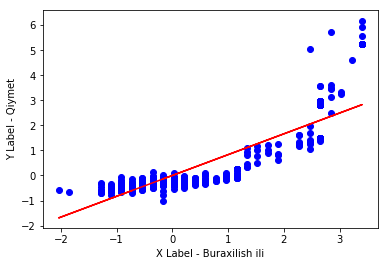

In [29]:
#Second plot for Buraxilish ili and Qiymet

plt.figure(11)
plt.scatter(X2, y, color = 'b')
plt.xlabel('X Label - Buraxilish ili')
plt.ylabel('Y Label - Qiymet')
pr_ = N_theta[2] * X2 + N_theta[0]
plt.plot(X2, pr_, c ='r')

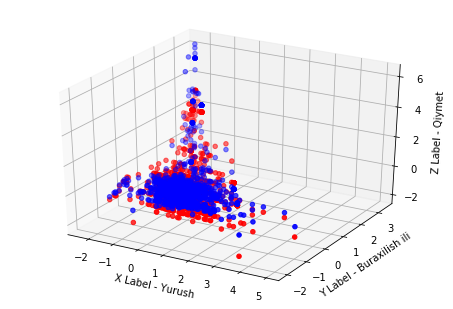

In [30]:
fig = plt.figure(12)
ax = fig.add_subplot( projection='3d') #3d projection
ax = Axes3D(fig)
ax.scatter(X1, X2, y, c = 'b') 
ax.set_xlabel('X Label - Yurush')
ax.set_ylabel('Y Label - Buraxilish ili')
ax.set_zlabel('Z Label - Qiymet')
pr_ = N_theta[1] * X1 + N_theta[2] * X2 + N_theta[0]
ax.scatter(X1, X2, pr_, c = 'r' )


In [31]:
#Instead of linear function use polynomial which over
#performed linear hypothesis accuracy 
#we can define polynomial function with scratch or we can use sklearn PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression

In [32]:
X_t, y_t = make_regression(n_samples = 300, n_features=1, noise=8, bias=2)
y2 = y_t**2


In [33]:
poly_features = PolynomialFeatures(degree = 5)  
X_poly = poly_features.fit_transform(X_t)
poly_model = LinearRegression()  
poly_model.fit(X_poly, y2)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

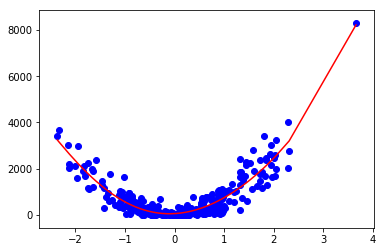

In [34]:
pred = poly_model.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X_t, pred))) # sort values for plotting
plt.plot(new_X, new_y, c = 'r')
plt.scatter(X_t,y2, c = 'b')